# Análise da Cotação do Dolar no Período de 01/01/2016 e 21/05/2021

Para fazer a análise da Cotação do Dólar, utilizei os dados abertos disponiilizados pelo Banco Central

In [1]:
#Carregando os dados utilizando a função pd.read_csv da bilioteca pandas 

import pandas as pd

url_dados = "https://olinda.bcb.gov.br/olinda/servico/PTAX/versao/v1/odata/CotacaoDolarPeriodo(dataInicial=@dataInicial,dataFinalCotacao=@dataFinalCotacao)?@dataInicial='01-01-2016'&@dataFinalCotacao='05-21-2021'&$top=10000&$format=text/csv&$select=cotacaoCompra,cotacaoVenda,dataHoraCotacao"
base_dolar = pd.read_csv(url_dados)

In [2]:
#Visualizando a base
base_dolar

,cotacaoCompra,cotacaoVenda,dataHoraCotacao
0,"4,038","4,0387",2016-01-04 13:12:41.021
1,"4,0108","4,0114",2016-01-05 13:12:41.306
2,"4,0297","4,0303",2016-01-06 13:08:04.506
3,"4,0469","4,0475",2016-01-07 13:07:20.817
4,"4,0244","4,025",2016-01-08 13:11:21.614
...,...,...,...
1345,"5,2749","5,2755",2021-05-17 13:07:28.963
1346,"5,2582","5,2588",2021-05-18 13:06:44.978
1347,"5,2816","5,2822",2021-05-19 13:10:26.529
1348,"5,2899","5,2905",2021-05-20 13:06:37.39


Visualizando a base, vemos que ela é composta por três informações: a cotação do Dólar para venda, a cotação para compra e a data e hora da cotação.

## Identificando qual a Data e o Valor da Última Cotação

Para identificar a data da última cotação, primeiro é preciso criar uma nova coluna somente com as datas das cotações

In [3]:
#Separando a coluna de data e hora da cotação pelo espaço

separa_data = base_dolar['dataHoraCotacao'].str.split(' ')
separa_data.head()

0    [2016-01-04, 13:12:41.021]
1    [2016-01-05, 13:12:41.306]
2    [2016-01-06, 13:08:04.506]
3    [2016-01-07, 13:07:20.817]
4    [2016-01-08, 13:11:21.614]
Name: dataHoraCotacao, dtype: object

In [4]:
#Selecionano somente o valor da data da cotação e criando uma nova coluna com esses valores 

data = separa_data.str.get(0)
base_dolar['data'] = data
base_dolar.head()

,cotacaoCompra,cotacaoVenda,dataHoraCotacao,data
0,"4,038","4,0387",2016-01-04 13:12:41.021,2016-01-04
1,"4,0108","4,0114",2016-01-05 13:12:41.306,2016-01-05
2,"4,0297","4,0303",2016-01-06 13:08:04.506,2016-01-06
3,"4,0469","4,0475",2016-01-07 13:07:20.817,2016-01-07
4,"4,0244","4,025",2016-01-08 13:11:21.614,2016-01-08


Em seguida salvo o valor da data da última cotação e em seguida filtro os dados a partir desse valor

In [5]:
data_ultima_cotacao = base_dolar['data'].max()
data_ultima_cotacao

'2021-05-21'

In [6]:
base_filtrada = base_dolar.query('data in @data_ultima_cotacao')
base_filtrada

,cotacaoCompra,cotacaoVenda,dataHoraCotacao,data
1349,"5,3021","5,3027",2021-05-21 13:11:21.274,2021-05-21


In [8]:
base_filtrada[['cotacaoCompra','data']]

,cotacaoCompra,data
1349,"5,3021",2021-05-21


## Visualizando a cotação diária

Primeiro vamos visualizar o tipo de cada coluna

In [9]:
#visualizando o tipo de cada coluna

base_dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cotacaoCompra    1350 non-null   object
 1   cotacaoVenda     1350 non-null   object
 2   dataHoraCotacao  1350 non-null   object
 3   data             1350 non-null   object
dtypes: object(4)
memory usage: 42.3+ KB


Vemos que os valores de data são do tipo object, e para fazer a visualização precisamos que os dados estejam no formato datetime.

In [10]:
#mudando o tipo da coluna data para datetime

base_dolar['data'] = pd.to_datetime(base_dolar['data'])

In [11]:
base_dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   cotacaoCompra    1350 non-null   object        
 1   cotacaoVenda     1350 non-null   object        
 2   dataHoraCotacao  1350 non-null   object        
 3   data             1350 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 42.3+ KB


Agora vamos modificar substituir a vírgula por ponto nas colunas referentes aos valores de cotação e em seguida alteral o tipo para numeric.

In [13]:
base_dolar['cotacaoCompra'] = base_dolar['cotacaoCompra'].str.replace(',','.')
base_dolar['cotacaoVenda'] = base_dolar['cotacaoVenda'].str.replace(',','.')

base_dolar.head()



,cotacaoCompra,cotacaoVenda,dataHoraCotacao,data
0,4.038,4.0387,2016-01-04 13:12:41.021,2016-01-04
1,4.0108,4.0114,2016-01-05 13:12:41.306,2016-01-05
2,4.0297,4.0303,2016-01-06 13:08:04.506,2016-01-06
3,4.0469,4.0475,2016-01-07 13:07:20.817,2016-01-07
4,4.0244,4.025,2016-01-08 13:11:21.614,2016-01-08


In [14]:
#Modificando o tipo das colunas de cotação de objeto para numérico

base_dolar['cotacaoCompra'] =  pd.to_numeric(base_dolar['cotacaoCompra'])
base_dolar['cotacaoVenda'] =  pd.to_numeric(base_dolar['cotacaoVenda'])

base_dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   cotacaoCompra    1350 non-null   float64       
 1   cotacaoVenda     1350 non-null   float64       
 2   dataHoraCotacao  1350 non-null   object        
 3   data             1350 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 42.3+ KB


Agora que os dados estão no formato adequado, podemos visualizar o gráfico com a cotação diária Período de 01/01/2016 e 21/05/2021

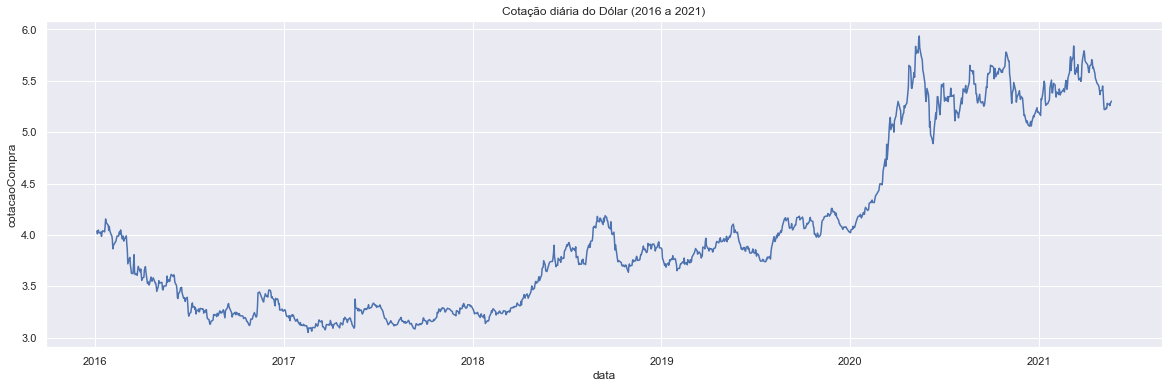

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(20, 6))
sns.lineplot(data=base_dolar, x="data", y="cotacaoCompra")
plt.title('Cotação diária do Dólar (2016 a 2021)')
plt.show()

Vemos que em 2020 houve um pico, o que pode ser explicado pela pandemia causada pelo Covid-19.

## Visualização da Cotação Média Anual

Para isso vamos agrupas os dados da cotação pelo ano e fazer a média

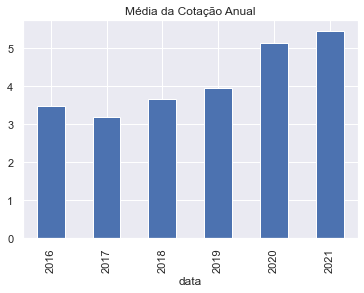

In [16]:
sns.set()
base_dolar.groupby(by = base_dolar['data'].dt.year)['cotacaoCompra'].mean().plot.bar()
plt.title('Média da Cotação Anual')
plt.show()

O gráfico acima apresenta a mesma curva do gráfico anterior. Em 2017 a cotação média ficou a baixo da de 2016 e a partir de 2018 começou a aumentar, apresentando um pico em 2020 que pode ser explicado pela pandemia causada pelo covid-19.

## Visualização da Cotação Média por Mês

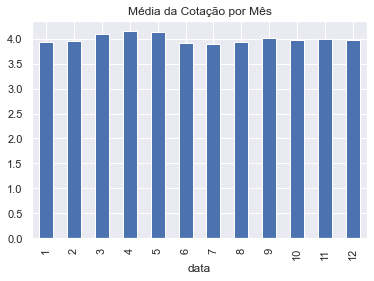

In [17]:
sns.set()
base_dolar.groupby(by = base_dolar['data'].dt.month)['cotacaoCompra'].mean().plot.bar()
plt.title('Média da Cotação por Mês')
plt.show()

No gráfico acima vemos que em média, nos meses 3, 4 e 5 (Março, Abril e Maio, respectivamente) são os meses onde o dólar está mais alto. Já os meses 6 e 7 (Junho e Julho, respectivamente) são os que